In [2]:
import numpy as np

In [141]:
BATCH_SIZE = 20000

In [3]:
def normalise_scores(scores):
    """normalise scores between 0 and 1"""
    return np.asarray(scores / abs(scores).max() / 2 + 0.5)

def load_dataset(batches, stockfish_depth):
    file_counter = 1
    path=f'data/batches/depth/{stockfish_depth:02d}'
    data = np.load(f'{path}/batch_{file_counter:02d}.npz')
    x_train, y_train = data['bitboards'], data['scores']
    while file_counter < batches:
        file_counter += 1
        new_data = np.load(f'{path}/batch_{file_counter:02d}.npz')
        x_train = np.append(x_train, new_data['bitboards'], axis=0)
        y_train = np.append(y_train, new_data['scores'])
    y_train = normalise_scores(y_train)
    return x_train, y_train

In [2]:
import tensorflow as tf
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import tensorflow.keras.optimizers as optimizers
import tensorflow.keras.callbacks as callbacks

In [4]:
def build_model(conv_size, conv_depth, dense_units):
    inputs = layers.Input(shape=(12, 8, 8))

    # adding the convolutional layers
    x = inputs
    for _ in range(conv_depth):
        x = layers.Conv2D(
            filters=conv_size,
            kernel_size=(3, 3),
            padding='same',
            activation='relu',
            data_format='channels_first'
        )(x)

    x = layers.Flatten()(x)
    x = layers.Dense(dense_units, activation='relu')(x)
    x = layers.Dense(1, activation='sigmoid')(x)

    return models.Model(inputs=inputs, outputs=x)

In [ ]:
number_filters = 32
number_conv_layers = 4
dense_layer_units = 64
model = build_model(number_filters, number_conv_layers, dense_layer_units) # initial 32, 4, 64 (64, 1, 64)
x_train, y_train = load_dataset(BATCHES)

model.compile(optimizer=optimizers.Adam(5e-4), loss='mean_squared_error')
model.summary()
history = model.fit(x_train, y_train,
          batch_size=2048,
          epochs=100,
          verbose=1,
          validation_split=0.2,
          callbacks=[callbacks.ReduceLROnPlateau(monitor='loss', patience=10),
                     callbacks.EarlyStopping(monitor='loss', patience=15, min_delta=1e-4)])

model.save(f'models/model_{number_filters}_filters_{number_conv_layers}_conv_layers_{dense_layer_units}_dense_units.h5')
print('New model saved')

In [52]:
number_filters = 64
number_conv_layers = 1
dense_layer_units = 64
model = build_model(number_filters, number_conv_layers, dense_layer_units) # initial 32, 4, 64 (64, 1, 64)
x_train, y_train = load_dataset(BATCHES)

model.compile(optimizer=optimizers.Adam(5e-4), loss='mean_squared_error')
model.summary()
history = model.fit(x_train, y_train,
          batch_size=2048,
          epochs=100,
          verbose=1,
          validation_split=0.2,
          callbacks=[callbacks.ReduceLROnPlateau(monitor='loss', patience=10),
                     callbacks.EarlyStopping(monitor='loss', patience=15, min_delta=1e-5)])

model.save(f'models/model_{number_filters}_filters_{number_conv_layers}_conv_layers_{dense_layer_units}_dense_units.h5')
print('New model saved')

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 12, 8, 8)]        0         
                                                                 
 conv2d_38 (Conv2D)          (None, 64, 8, 8)          6976      
                                                                 
 flatten_14 (Flatten)        (None, 4096)              0         
                                                                 
 dense_27 (Dense)            (None, 64)                262208    
                                                                 
 dense_28 (Dense)            (None, 1)                 65        
                                                                 
Total params: 269,249
Trainable params: 269,249
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
  1/391 [..............................]

2022-11-18 19:29:45.196230: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - ETA: 0s - loss: 3.0491e-04

2022-11-18 19:29:54.907314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - 11s 27ms/step - loss: 3.0491e-04 - val_loss: 2.9769e-04 - lr: 5.0000e-04
Epoch 2/100
391/391 [==============================] - 10s 26ms/step - loss: 2.6335e-04 - val_loss: 2.9273e-04 - lr: 5.0000e-04
Epoch 3/100
391/391 [==============================] - 10s 26ms/step - loss: 2.3819e-04 - val_loss: 2.8879e-04 - lr: 5.0000e-04
Epoch 4/100
391/391 [==============================] - 10s 26ms/step - loss: 2.1208e-04 - val_loss: 2.9514e-04 - lr: 5.0000e-04
Epoch 5/100
391/391 [==============================] - 10s 26ms/step - loss: 1.9009e-04 - val_loss: 2.8928e-04 - lr: 5.0000e-04
Epoch 6/100
391/391 [==============================] - 10s 26ms/step - loss: 1.6926e-04 - val_loss: 2.8599e-04 - lr: 5.0000e-04
Epoch 7/100
391/391 [==============================] - 10s 26ms/step - loss: 1.5116e-04 - val_loss: 2.8673e-04 - lr: 5.0000e-04
Epoch 8/100
391/391 [==============================] - 10s 26ms/step - loss: 1.3498e-04 - val_loss: 2.9089e-04 - lr:

In [63]:
number_filters = 64
number_conv_layers = 1
dense_layer_units = 64
batch_size = 4096
model = build_model(number_filters, number_conv_layers, dense_layer_units) # initial 32, 4, 64 (64, 1, 64)
x_train, y_train = load_dataset(BATCHES)

model.compile(optimizer=optimizers.Adam(5e-4), loss='mean_squared_error')
model.summary()
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          verbose=1,
          validation_split=0.2,
          callbacks=[callbacks.ReduceLROnPlateau(monitor='loss', patience=10),
                     callbacks.EarlyStopping(monitor='loss', patience=15, min_delta=1e-5)])

model.save(f'models/model_{number_filters}_filters_{number_conv_layers}_conv_layers_{dense_layer_units}_dense_units_{batch_size}_batch_size.h5')
print('New model saved')

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 12, 8, 8)]        0         
                                                                 
 conv2d_41 (Conv2D)          (None, 64, 8, 8)          6976      
                                                                 
 flatten_17 (Flatten)        (None, 4096)              0         
                                                                 
 dense_33 (Dense)            (None, 64)                262208    
                                                                 
 dense_34 (Dense)            (None, 1)                 65        
                                                                 
Total params: 269,249
Trainable params: 269,249
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
  1/196 [..............................]

2022-11-18 23:05:56.081927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


196/196 [==============================] - ETA: 0s - loss: 3.2976e-04

2022-11-18 23:06:03.922275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


196/196 [==============================] - 8s 42ms/step - loss: 3.2976e-04 - val_loss: 3.0373e-04 - lr: 5.0000e-04
Epoch 2/100
196/196 [==============================] - 8s 41ms/step - loss: 2.7724e-04 - val_loss: 2.9761e-04 - lr: 5.0000e-04
Epoch 3/100
196/196 [==============================] - 8s 41ms/step - loss: 2.6493e-04 - val_loss: 2.9315e-04 - lr: 5.0000e-04
Epoch 4/100
196/196 [==============================] - 8s 42ms/step - loss: 2.5259e-04 - val_loss: 2.8871e-04 - lr: 5.0000e-04
Epoch 5/100
196/196 [==============================] - 8s 42ms/step - loss: 2.3846e-04 - val_loss: 2.8348e-04 - lr: 5.0000e-04
Epoch 6/100
196/196 [==============================] - 8s 41ms/step - loss: 2.2587e-04 - val_loss: 2.7820e-04 - lr: 5.0000e-04
Epoch 7/100
196/196 [==============================] - 8s 41ms/step - loss: 2.1565e-04 - val_loss: 2.8167e-04 - lr: 5.0000e-04
Epoch 8/100
196/196 [==============================] - 8s 41ms/step - loss: 2.0732e-04 - val_loss: 2.8531e-04 - lr: 5.0000e

In [73]:
number_filters = 64
number_conv_layers = 2
dense_layer_units = 64
batch_size = 4096
model = build_model(number_filters, number_conv_layers, dense_layer_units) # initial 32, 4, 64 (64, 1, 64)
x_train, y_train = load_dataset(BATCHES)

model.compile(optimizer=optimizers.Adam(5e-4), loss='mean_squared_error')
model.summary()
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          verbose=1,
          validation_split=0.2,
          callbacks=[callbacks.ReduceLROnPlateau(monitor='loss', patience=10),
                     callbacks.EarlyStopping(monitor='loss', patience=15, min_delta=1e-5)])

model.save(f'models/model_{number_filters}_filters_{number_conv_layers}_conv_layers_{dense_layer_units}_dense_units_{batch_size}_batch_size.h5')
print('New model saved')

Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_32 (InputLayer)       [(None, 12, 8, 8)]        0         
                                                                 
 conv2d_52 (Conv2D)          (None, 64, 8, 8)          6976      
                                                                 
 conv2d_53 (Conv2D)          (None, 64, 8, 8)          36928     
                                                                 
 flatten_23 (Flatten)        (None, 4096)              0         
                                                                 
 dense_45 (Dense)            (None, 64)                262208    
                                                                 
 dense_46 (Dense)            (None, 1)                 65        
                                                                 
Total params: 306,177
Trainable params: 306,177
Non-traina

2022-11-18 23:32:30.758419: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


196/196 [==============================] - ETA: 0s - loss: 3.0238e-04

2022-11-18 23:32:45.720126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


196/196 [==============================] - 16s 79ms/step - loss: 3.0238e-04 - val_loss: 3.0278e-04 - lr: 5.0000e-04
Epoch 2/100
196/196 [==============================] - 15s 79ms/step - loss: 2.7657e-04 - val_loss: 2.9275e-04 - lr: 5.0000e-04
Epoch 3/100
196/196 [==============================] - 15s 78ms/step - loss: 2.5640e-04 - val_loss: 2.8343e-04 - lr: 5.0000e-04
Epoch 4/100
196/196 [==============================] - 15s 78ms/step - loss: 2.3769e-04 - val_loss: 2.7760e-04 - lr: 5.0000e-04
Epoch 5/100
196/196 [==============================] - 15s 79ms/step - loss: 2.1891e-04 - val_loss: 2.7477e-04 - lr: 5.0000e-04
Epoch 6/100
196/196 [==============================] - 15s 79ms/step - loss: 2.0587e-04 - val_loss: 2.7566e-04 - lr: 5.0000e-04
Epoch 7/100
196/196 [==============================] - 16s 79ms/step - loss: 1.8788e-04 - val_loss: 2.8213e-04 - lr: 5.0000e-04
Epoch 8/100
196/196 [==============================] - 15s 78ms/step - loss: 1.7263e-04 - val_loss: 2.7966e-04 - lr:

In [86]:
number_filters = 128
number_conv_layers = 2
dense_layer_units = 64
batch_size = 4096
model = build_model(number_filters, number_conv_layers, dense_layer_units) # initial 32, 4, 64 (64, 1, 64)
x_train, y_train = load_dataset(BATCHES)

model.compile(optimizer=optimizers.Adam(5e-4), loss='mean_squared_error')
model.summary()
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          verbose=1,
          validation_split=0.2,
          callbacks=[callbacks.ReduceLROnPlateau(monitor='val_loss', patience=10),
                     callbacks.EarlyStopping(monitor='val_loss', patience=15, min_delta=1e-5)])

model.save(f'models/model_{number_filters}_filters_{number_conv_layers}_conv_layers_{dense_layer_units}_dense_units_{batch_size}_batch_size.h5')
print('New model saved')

Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_35 (InputLayer)       [(None, 12, 8, 8)]        0         
                                                                 
 conv2d_60 (Conv2D)          (None, 128, 8, 8)         13952     
                                                                 
 conv2d_61 (Conv2D)          (None, 128, 8, 8)         147584    
                                                                 
 flatten_26 (Flatten)        (None, 8192)              0         
                                                                 
 dense_51 (Dense)            (None, 64)                524352    
                                                                 
 dense_52 (Dense)            (None, 1)                 65        
                                                                 
Total params: 685,953
Trainable params: 685,953
Non-traina

2022-11-19 00:10:35.160746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


196/196 [==============================] - ETA: 0s - loss: 3.0984e-04

2022-11-19 00:10:57.123462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


196/196 [==============================] - 23s 116ms/step - loss: 3.0984e-04 - val_loss: 3.0120e-04 - lr: 5.0000e-04
Epoch 2/100
196/196 [==============================] - 23s 115ms/step - loss: 2.7206e-04 - val_loss: 2.8964e-04 - lr: 5.0000e-04
Epoch 3/100
196/196 [==============================] - 23s 115ms/step - loss: 2.5262e-04 - val_loss: 2.7955e-04 - lr: 5.0000e-04
Epoch 4/100
196/196 [==============================] - 23s 115ms/step - loss: 2.3364e-04 - val_loss: 2.7370e-04 - lr: 5.0000e-04
Epoch 5/100
196/196 [==============================] - 23s 115ms/step - loss: 2.1871e-04 - val_loss: 2.7515e-04 - lr: 5.0000e-04
Epoch 6/100
196/196 [==============================] - 23s 115ms/step - loss: 2.0383e-04 - val_loss: 2.7223e-04 - lr: 5.0000e-04
Epoch 7/100
196/196 [==============================] - 23s 115ms/step - loss: 1.9004e-04 - val_loss: 2.8095e-04 - lr: 5.0000e-04
Epoch 8/100
196/196 [==============================] - 22s 115ms/step - loss: 1.7551e-04 - val_loss: 2.8701e-

In [88]:
number_filters = 128
number_conv_layers = 1
dense_layer_units = 64
batch_size = 4096
model = build_model(number_filters, number_conv_layers, dense_layer_units) # initial 32, 4, 64 (64, 1, 64)
x_train, y_train = load_dataset(BATCHES)

model.compile(optimizer=optimizers.Adam(5e-4), loss='mean_squared_error')
model.summary()
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          verbose=1,
          validation_split=0.2,
          callbacks=[callbacks.ReduceLROnPlateau(monitor='val_loss', patience=10),
                     callbacks.EarlyStopping(monitor='val_loss', patience=15, min_delta=1e-5)])

model.save(f'models/model_{number_filters}_filters_{number_conv_layers}_conv_layers_{dense_layer_units}_dense_units_{batch_size}_batch_size.h5')
print('New model saved')

Model: "model_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_37 (InputLayer)       [(None, 12, 8, 8)]        0         
                                                                 
 conv2d_64 (Conv2D)          (None, 128, 8, 8)         13952     
                                                                 
 flatten_28 (Flatten)        (None, 8192)              0         
                                                                 
 dense_55 (Dense)            (None, 64)                524352    
                                                                 
 dense_56 (Dense)            (None, 1)                 65        
                                                                 
Total params: 538,369
Trainable params: 538,369
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
  1/196 [..............................]

2022-11-19 00:28:47.454892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


196/196 [==============================] - ETA: 0s - loss: 3.2757e-04

2022-11-19 00:28:56.442378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


196/196 [==============================] - 10s 48ms/step - loss: 3.2757e-04 - val_loss: 3.0963e-04 - lr: 5.0000e-04
Epoch 2/100
196/196 [==============================] - 9s 47ms/step - loss: 2.8210e-04 - val_loss: 2.9858e-04 - lr: 5.0000e-04
Epoch 3/100
196/196 [==============================] - 9s 46ms/step - loss: 2.6692e-04 - val_loss: 2.9123e-04 - lr: 5.0000e-04
Epoch 4/100
196/196 [==============================] - 9s 46ms/step - loss: 2.5121e-04 - val_loss: 2.8231e-04 - lr: 5.0000e-04
Epoch 5/100
196/196 [==============================] - 9s 46ms/step - loss: 2.3650e-04 - val_loss: 2.7505e-04 - lr: 5.0000e-04
Epoch 6/100
196/196 [==============================] - 9s 46ms/step - loss: 2.2549e-04 - val_loss: 2.7187e-04 - lr: 5.0000e-04
Epoch 7/100
196/196 [==============================] - 9s 47ms/step - loss: 2.1511e-04 - val_loss: 2.7126e-04 - lr: 5.0000e-04
Epoch 8/100
196/196 [==============================] - 9s 47ms/step - loss: 2.0671e-04 - val_loss: 2.7098e-04 - lr: 5.0000

In [90]:
number_filters = 128
number_conv_layers = 1
dense_layer_units = 128
batch_size = 4096
model = build_model(number_filters, number_conv_layers, dense_layer_units) # initial 32, 4, 64 (64, 1, 64)
x_train, y_train = load_dataset(BATCHES)

model.compile(optimizer=optimizers.Adam(5e-4), loss='mean_squared_error')
model.summary()
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          verbose=1,
          validation_split=0.2,
          callbacks=[callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.2),
                     callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=1e-5)])

model.save(f'models/model_{number_filters}_filters_{number_conv_layers}_conv_layers_{dense_layer_units}_dense_units_{batch_size}_batch_size.h5')
print('New model saved')

Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_39 (InputLayer)       [(None, 12, 8, 8)]        0         
                                                                 
 conv2d_66 (Conv2D)          (None, 128, 8, 8)         13952     
                                                                 
 flatten_30 (Flatten)        (None, 8192)              0         
                                                                 
 dense_59 (Dense)            (None, 128)               1048704   
                                                                 
 dense_60 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,062,785
Trainable params: 1,062,785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
  1/196 [...........................

2022-11-19 00:41:32.386869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


196/196 [==============================] - ETA: 0s - loss: 3.4228e-04

2022-11-19 00:41:41.613317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


196/196 [==============================] - 10s 49ms/step - loss: 3.4228e-04 - val_loss: 3.0822e-04 - lr: 5.0000e-04
Epoch 2/100
196/196 [==============================] - 10s 49ms/step - loss: 2.8931e-04 - val_loss: 3.0148e-04 - lr: 5.0000e-04
Epoch 3/100
196/196 [==============================] - 10s 49ms/step - loss: 2.7648e-04 - val_loss: 2.9523e-04 - lr: 5.0000e-04
Epoch 4/100
196/196 [==============================] - 10s 49ms/step - loss: 2.6052e-04 - val_loss: 2.8992e-04 - lr: 5.0000e-04
Epoch 5/100
196/196 [==============================] - 10s 49ms/step - loss: 2.4182e-04 - val_loss: 2.7799e-04 - lr: 5.0000e-04
Epoch 6/100
196/196 [==============================] - 9s 48ms/step - loss: 2.2591e-04 - val_loss: 2.7154e-04 - lr: 5.0000e-04
Epoch 7/100
196/196 [==============================] - 9s 48ms/step - loss: 2.1579e-04 - val_loss: 2.7035e-04 - lr: 1.0000e-04
Epoch 8/100
196/196 [==============================] - 10s 49ms/step - loss: 2.1337e-04 - val_loss: 2.7008e-04 - lr: 1

In [100]:
tf.keras.utils.set_random_seed(42)

number_filters = 128
number_conv_layers = 1
dense_layer_units = 128
batch_size = 10000
model = build_model(number_filters, number_conv_layers, dense_layer_units) # initial 32, 4, 64 (64, 1, 64)
x_train, y_train = load_dataset(BATCHES)

model.compile(optimizer=optimizers.Adam(5e-4), loss='mean_squared_error')
model.summary()
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          verbose=1,
          validation_split=0.2,
          callbacks=[callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5, min_delta=1e-5, factor=0.2),
                     callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=1e-5)])

model.save(f'models/model_{number_filters}_filters_{number_conv_layers}_conv_layers_{dense_layer_units}_dense_units_{batch_size}_batch_size.h5')
print('New model saved')

Model: "model_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_49 (InputLayer)       [(None, 12, 8, 8)]        0         
                                                                 
 conv2d_76 (Conv2D)          (None, 128, 8, 8)         13952     
                                                                 
 flatten_40 (Flatten)        (None, 8192)              0         
                                                                 
 dense_79 (Dense)            (None, 128)               1048704   
                                                                 
 dense_80 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,062,785
Trainable params: 1,062,785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


2022-11-19 01:13:05.435839: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


80/80 [==============================] - ETA: 0s - loss: 4.0798e-04

2022-11-19 01:13:13.641227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


80/80 [==============================] - 9s 105ms/step - loss: 4.0798e-04 - val_loss: 3.1231e-04 - lr: 5.0000e-04
Epoch 2/100
80/80 [==============================] - 8s 105ms/step - loss: 2.9668e-04 - val_loss: 3.1038e-04 - lr: 5.0000e-04
Epoch 3/100
80/80 [==============================] - 8s 104ms/step - loss: 2.9044e-04 - val_loss: 3.0269e-04 - lr: 5.0000e-04
Epoch 4/100
80/80 [==============================] - 8s 106ms/step - loss: 2.7999e-04 - val_loss: 2.9885e-04 - lr: 5.0000e-04
Epoch 5/100
80/80 [==============================] - 8s 104ms/step - loss: 2.7176e-04 - val_loss: 2.9596e-04 - lr: 5.0000e-04
Epoch 6/100
80/80 [==============================] - 8s 104ms/step - loss: 2.6459e-04 - val_loss: 2.9356e-04 - lr: 5.0000e-04
Epoch 7/100
80/80 [==============================] - 8s 104ms/step - loss: 2.5680e-04 - val_loss: 2.8967e-04 - lr: 5.0000e-04
Epoch 8/100
80/80 [==============================] - 8s 104ms/step - loss: 2.4793e-04 - val_loss: 2.8538e-04 - lr: 5.0000e-04
Epoc

In [101]:
tf.keras.utils.set_random_seed(42)

number_filters = 128
number_conv_layers = 1
dense_layer_units = 128
batch_size = 8000
model = build_model(number_filters, number_conv_layers, dense_layer_units) # initial 32, 4, 64
x_train, y_train = load_dataset(BATCHES)

model.compile(optimizer=optimizers.Adam(5e-4), loss='mean_squared_error')
model.summary()
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          verbose=1,
          validation_split=0.2,
          callbacks=[callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5, min_delta=1e-5, factor=0.2),
                     callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=1e-5)])

model.save(f'models/model_{number_filters}_filters_{number_conv_layers}_conv_layers_{dense_layer_units}_dense_units_{batch_size}_batch_size.h5')
print('New model saved')

Model: "model_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_50 (InputLayer)       [(None, 12, 8, 8)]        0         
                                                                 
 conv2d_77 (Conv2D)          (None, 128, 8, 8)         13952     
                                                                 
 flatten_41 (Flatten)        (None, 8192)              0         
                                                                 
 dense_81 (Dense)            (None, 128)               1048704   
                                                                 
 dense_82 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,062,785
Trainable params: 1,062,785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


2022-11-19 01:16:58.541678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 3.8220e-04

2022-11-19 01:17:06.992032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 9s 86ms/step - loss: 3.8220e-04 - val_loss: 3.1164e-04 - lr: 5.0000e-04
Epoch 2/100
100/100 [==============================] - 9s 85ms/step - loss: 2.9480e-04 - val_loss: 3.0598e-04 - lr: 5.0000e-04
Epoch 3/100
100/100 [==============================] - 8s 85ms/step - loss: 2.8271e-04 - val_loss: 2.9914e-04 - lr: 5.0000e-04
Epoch 4/100
100/100 [==============================] - 9s 85ms/step - loss: 2.7225e-04 - val_loss: 2.9587e-04 - lr: 5.0000e-04
Epoch 5/100
100/100 [==============================] - 8s 85ms/step - loss: 2.6318e-04 - val_loss: 2.9257e-04 - lr: 5.0000e-04
Epoch 6/100
100/100 [==============================] - 9s 85ms/step - loss: 2.5297e-04 - val_loss: 2.8696e-04 - lr: 5.0000e-04
Epoch 7/100
100/100 [==============================] - 8s 85ms/step - loss: 2.4159e-04 - val_loss: 2.8041e-04 - lr: 5.0000e-04
Epoch 8/100
100/100 [==============================] - 9s 85ms/step - loss: 2.2994e-04 - val_loss: 2.7657e-04 - lr: 5.0000e

In [112]:
tf.keras.utils.set_random_seed(42)

number_filters = 128
number_conv_layers = 1
dense_layer_units = 128
batch_size = 8000
stockfish_depth = 5
model = build_model(number_filters, number_conv_layers, dense_layer_units) # initial 32, 4, 64
x_train, y_train = load_dataset(batches=BATCHES, stockfish_depth=stockfish_depth)

model.compile(optimizer=optimizers.Adam(5e-5), loss='mean_squared_error')
model.summary()
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          verbose=1,
          validation_split=0.2,
          callbacks=[callbacks.ReduceLROnPlateau(monitor='val_loss', patience=10, min_delta=1e-6, factor=0.2),
                     callbacks.EarlyStopping(monitor='val_loss', patience=20, min_delta=1e-6)])

model.save(f'models/model_{number_filters}_filters_{number_conv_layers}_conv_layers_{dense_layer_units}_dense_units_{batch_size}_batch_size_{stockfish_depth}_depth.h5')
print('New model saved')

Model: "model_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_58 (InputLayer)       [(None, 12, 8, 8)]        0         
                                                                 
 conv2d_85 (Conv2D)          (None, 128, 8, 8)         13952     
                                                                 
 flatten_49 (Flatten)        (None, 8192)              0         
                                                                 
 dense_97 (Dense)            (None, 128)               1048704   
                                                                 
 dense_98 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,062,785
Trainable params: 1,062,785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


2022-11-19 13:31:54.996950: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 8.0842e-05

2022-11-19 13:32:03.426712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 9s 87ms/step - loss: 8.0842e-05 - val_loss: 8.1856e-05 - lr: 5.0000e-05
Epoch 2/100
100/100 [==============================] - 8s 85ms/step - loss: 6.2314e-05 - val_loss: 7.6299e-05 - lr: 5.0000e-05
Epoch 3/100
100/100 [==============================] - 8s 85ms/step - loss: 5.8504e-05 - val_loss: 7.4135e-05 - lr: 5.0000e-05
Epoch 4/100
100/100 [==============================] - 9s 85ms/step - loss: 5.6997e-05 - val_loss: 7.3543e-05 - lr: 5.0000e-05
Epoch 5/100
100/100 [==============================] - 8s 85ms/step - loss: 5.6196e-05 - val_loss: 7.3289e-05 - lr: 5.0000e-05
Epoch 6/100
100/100 [==============================] - 9s 85ms/step - loss: 5.5534e-05 - val_loss: 7.3159e-05 - lr: 5.0000e-05
Epoch 7/100
100/100 [==============================] - 9s 85ms/step - loss: 5.4886e-05 - val_loss: 7.3055e-05 - lr: 5.0000e-05
Epoch 8/100
100/100 [==============================] - 9s 85ms/step - loss: 5.4243e-05 - val_loss: 7.3072e-05 - lr: 5.0000e

In [111]:
tf.keras.utils.set_random_seed(42)

number_filters = 128
number_conv_layers = 1
dense_layer_units = 128
batch_size = 8000
stockfish_depth = 0
model = build_model(number_filters, number_conv_layers, dense_layer_units) # initial 32, 4, 64
x_train, y_train = load_dataset(batches=BATCHES, stockfish_depth=stockfish_depth)

model.compile(optimizer=optimizers.Adam(5e-5), loss='mean_squared_error')
model.summary()
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          verbose=1,
          validation_split=0.2,
          callbacks=[callbacks.ReduceLROnPlateau(monitor='val_loss', patience=10, min_delta=1e-6, factor=0.2),
                     callbacks.EarlyStopping(monitor='val_loss', patience=20, min_delta=1e-6)])

model.save(f'models/model_{number_filters}_filters_{number_conv_layers}_conv_layers_{dense_layer_units}_dense_units_{batch_size}_batch_size_{stockfish_depth}_depth.h5')
print('New model saved')

Model: "model_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_57 (InputLayer)       [(None, 12, 8, 8)]        0         
                                                                 
 conv2d_84 (Conv2D)          (None, 128, 8, 8)         13952     
                                                                 
 flatten_48 (Flatten)        (None, 8192)              0         
                                                                 
 dense_95 (Dense)            (None, 128)               1048704   
                                                                 
 dense_96 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,062,785
Trainable params: 1,062,785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
  1/100 [...........................

2022-11-19 13:24:25.785079: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 5.3652e-05

2022-11-19 13:24:34.220126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 9s 87ms/step - loss: 5.3652e-05 - val_loss: 4.9656e-05 - lr: 5.0000e-05
Epoch 2/100
100/100 [==============================] - 9s 86ms/step - loss: 3.4979e-05 - val_loss: 4.3816e-05 - lr: 5.0000e-05
Epoch 3/100
100/100 [==============================] - 9s 86ms/step - loss: 3.1110e-05 - val_loss: 4.1634e-05 - lr: 5.0000e-05
Epoch 4/100
100/100 [==============================] - 9s 86ms/step - loss: 2.9828e-05 - val_loss: 4.1011e-05 - lr: 5.0000e-05
Epoch 5/100
100/100 [==============================] - 9s 87ms/step - loss: 2.9308e-05 - val_loss: 4.0696e-05 - lr: 5.0000e-05
Epoch 6/100
100/100 [==============================] - 9s 86ms/step - loss: 2.8947e-05 - val_loss: 4.0504e-05 - lr: 5.0000e-05
Epoch 7/100
100/100 [==============================] - 9s 86ms/step - loss: 2.8644e-05 - val_loss: 4.0350e-05 - lr: 5.0000e-05
Epoch 8/100
100/100 [==============================] - 9s 86ms/step - loss: 2.8368e-05 - val_loss: 4.0267e-05 - lr: 5.0000e

In [113]:
tf.keras.utils.set_random_seed(42)

number_filters = 128
number_conv_layers = 1
dense_layer_units = 128
batch_size = 8000
stockfish_depth = 1
model = build_model(number_filters, number_conv_layers, dense_layer_units) # initial 32, 4, 64
x_train, y_train = load_dataset(batches=BATCHES, stockfish_depth=stockfish_depth)

model.compile(optimizer=optimizers.Adam(5e-5), loss='mean_squared_error')
model.summary()
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          verbose=1,
          validation_split=0.2,
          callbacks=[callbacks.ReduceLROnPlateau(monitor='val_loss', patience=10, min_delta=1e-6, factor=0.2),
                     callbacks.EarlyStopping(monitor='val_loss', patience=20, min_delta=1e-6)])

model.save(f'models/model_{number_filters}_filters_{number_conv_layers}_conv_layers_{dense_layer_units}_dense_units_{batch_size}_batch_size_{stockfish_depth}_depth.h5')
print('New model saved')

Model: "model_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_59 (InputLayer)       [(None, 12, 8, 8)]        0         
                                                                 
 conv2d_86 (Conv2D)          (None, 128, 8, 8)         13952     
                                                                 
 flatten_50 (Flatten)        (None, 8192)              0         
                                                                 
 dense_99 (Dense)            (None, 128)               1048704   
                                                                 
 dense_100 (Dense)           (None, 1)                 129       
                                                                 
Total params: 1,062,785
Trainable params: 1,062,785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


2022-11-19 14:28:30.474263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 5.3652e-05

2022-11-19 14:28:38.990988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 9s 86ms/step - loss: 5.3652e-05 - val_loss: 4.9656e-05 - lr: 5.0000e-05
Epoch 2/100
100/100 [==============================] - 9s 86ms/step - loss: 3.4979e-05 - val_loss: 4.3816e-05 - lr: 5.0000e-05
Epoch 3/100
100/100 [==============================] - 9s 86ms/step - loss: 3.1110e-05 - val_loss: 4.1634e-05 - lr: 5.0000e-05
Epoch 4/100
100/100 [==============================] - 9s 85ms/step - loss: 2.9828e-05 - val_loss: 4.1011e-05 - lr: 5.0000e-05
Epoch 5/100
100/100 [==============================] - 9s 85ms/step - loss: 2.9308e-05 - val_loss: 4.0696e-05 - lr: 5.0000e-05
Epoch 6/100
100/100 [==============================] - 9s 85ms/step - loss: 2.8947e-05 - val_loss: 4.0504e-05 - lr: 5.0000e-05
Epoch 7/100
100/100 [==============================] - 9s 86ms/step - loss: 2.8644e-05 - val_loss: 4.0350e-05 - lr: 5.0000e-05
Epoch 8/100
100/100 [==============================] - 9s 86ms/step - loss: 2.8368e-05 - val_loss: 4.0267e-05 - lr: 5.0000e

In [114]:
tf.keras.utils.set_random_seed(42)

number_filters = 128
number_conv_layers = 1
dense_layer_units = 128
batch_size = 8000
stockfish_depth = 2
model = build_model(number_filters, number_conv_layers, dense_layer_units) # initial 32, 4, 64
x_train, y_train = load_dataset(batches=BATCHES, stockfish_depth=stockfish_depth)

model.compile(optimizer=optimizers.Adam(5e-5), loss='mean_squared_error')
model.summary()
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          verbose=1,
          validation_split=0.2,
          callbacks=[callbacks.ReduceLROnPlateau(monitor='val_loss', patience=10, min_delta=1e-6, factor=0.2),
                     callbacks.EarlyStopping(monitor='val_loss', patience=20, min_delta=1e-6)])

model.save(f'models/model_{number_filters}_filters_{number_conv_layers}_conv_layers_{dense_layer_units}_dense_units_{batch_size}_batch_size_{stockfish_depth}_depth.h5')
print('New model saved')

Model: "model_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_60 (InputLayer)       [(None, 12, 8, 8)]        0         
                                                                 
 conv2d_87 (Conv2D)          (None, 128, 8, 8)         13952     
                                                                 
 flatten_51 (Flatten)        (None, 8192)              0         
                                                                 
 dense_101 (Dense)           (None, 128)               1048704   
                                                                 
 dense_102 (Dense)           (None, 1)                 129       
                                                                 
Total params: 1,062,785
Trainable params: 1,062,785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


2022-11-19 14:53:37.241800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 6.8263e-05

2022-11-19 14:53:45.695607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 9s 86ms/step - loss: 6.8263e-05 - val_loss: 6.5184e-05 - lr: 5.0000e-05
Epoch 2/100
100/100 [==============================] - 9s 86ms/step - loss: 4.9553e-05 - val_loss: 5.9452e-05 - lr: 5.0000e-05
Epoch 3/100
100/100 [==============================] - 8s 85ms/step - loss: 4.5632e-05 - val_loss: 5.7199e-05 - lr: 5.0000e-05
Epoch 4/100
100/100 [==============================] - 9s 86ms/step - loss: 4.4296e-05 - val_loss: 5.6657e-05 - lr: 5.0000e-05
Epoch 5/100
100/100 [==============================] - 9s 86ms/step - loss: 4.3746e-05 - val_loss: 5.6382e-05 - lr: 5.0000e-05
Epoch 6/100
100/100 [==============================] - 9s 86ms/step - loss: 4.3344e-05 - val_loss: 5.6237e-05 - lr: 5.0000e-05
Epoch 7/100
100/100 [==============================] - 9s 86ms/step - loss: 4.2977e-05 - val_loss: 5.6119e-05 - lr: 5.0000e-05
Epoch 8/100
100/100 [==============================] - 9s 86ms/step - loss: 4.2638e-05 - val_loss: 5.6071e-05 - lr: 5.0000e

In [134]:
tf.keras.utils.set_random_seed(42)

number_filters = 128
number_conv_layers = 1
dense_layer_units = 128
batch_size = 8000
#stockfish_depth = 2
model = build_model(number_filters, number_conv_layers, dense_layer_units) # initial 32, 4, 64
data = np.load(f'data/dataset.npz')
x_train, y_train = data['b'], data['v']
x_train = np.array([x[:12] for x in x_train])
y_train = normalise_scores(y_train)

model.compile(optimizer=optimizers.Adam(5e-4), loss='mean_squared_error')
model.summary()
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          verbose=1,
          validation_split=0.2,
          callbacks=[callbacks.ReduceLROnPlateau(monitor='val_loss', patience=10, min_delta=1e-5, factor=0.2),
                     callbacks.EarlyStopping(monitor='val_loss', patience=20, min_delta=1e-5)])

model.save(f'models/model_{number_filters}_filters_{number_conv_layers}_conv_layers_{dense_layer_units}_dense_units_{batch_size}_batch_size_{stockfish_depth}_depth.h5')
print('New model saved')

Model: "model_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_63 (InputLayer)       [(None, 12, 8, 8)]        0         
                                                                 
 conv2d_90 (Conv2D)          (None, 128, 8, 8)         13952     
                                                                 
 flatten_54 (Flatten)        (None, 8192)              0         
                                                                 
 dense_107 (Dense)           (None, 128)               1048704   
                                                                 
 dense_108 (Dense)           (None, 1)                 129       
                                                                 
Total params: 1,062,785
Trainable params: 1,062,785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


2022-11-19 15:15:14.623746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


150/150 [==============================] - ETA: 0s - loss: 0.0042

2022-11-19 15:15:27.042520: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


150/150 [==============================] - 13s 86ms/step - loss: 0.0042 - val_loss: 0.0039 - lr: 5.0000e-04
Epoch 2/100
150/150 [==============================] - 12s 83ms/step - loss: 0.0015 - val_loss: 7.8013e-04 - lr: 5.0000e-04
Epoch 3/100
150/150 [==============================] - 13s 84ms/step - loss: 9.0560e-04 - val_loss: 7.1260e-04 - lr: 5.0000e-04
Epoch 4/100
150/150 [==============================] - 13s 84ms/step - loss: 8.5545e-04 - val_loss: 6.6856e-04 - lr: 5.0000e-04
Epoch 5/100
150/150 [==============================] - 13s 84ms/step - loss: 8.2229e-04 - val_loss: 6.1553e-04 - lr: 5.0000e-04
Epoch 6/100
150/150 [==============================] - 13s 84ms/step - loss: 8.0149e-04 - val_loss: 6.1844e-04 - lr: 5.0000e-04
Epoch 7/100
150/150 [==============================] - 13s 84ms/step - loss: 7.8454e-04 - val_loss: 5.9312e-04 - lr: 5.0000e-04
Epoch 8/100
150/150 [==============================] - 13s 84ms/step - loss: 7.7255e-04 - val_loss: 5.8722e-04 - lr: 5.0000e-04


In [137]:
tf.keras.utils.set_random_seed(42)

number_filters = 128
number_conv_layers = 1
dense_layer_units = 128
batch_size = 8000
#stockfish_depth = 2
model = build_model(number_filters, number_conv_layers, dense_layer_units) # initial 32, 4, 64
data = np.load(f'data/dataset.npz')
x_train, y_train = data['b'], data['v']
y_train = normalise_scores(y_train)

model.compile(optimizer=optimizers.Adam(5e-4), loss='mean_squared_error')
model.summary()
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          verbose=1,
          validation_split=0.2,
          callbacks=[callbacks.ReduceLROnPlateau(monitor='val_loss', patience=10, min_delta=1e-5, factor=0.2),
                     callbacks.EarlyStopping(monitor='val_loss', patience=20, min_delta=1e-5)])

model.save(f'models/model_{number_filters}_filters_{number_conv_layers}_conv_layers_{dense_layer_units}_dense_units_{batch_size}_batch_size_downloaded_attacked.h5')
print('New model saved')

Model: "model_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_65 (InputLayer)       [(None, 14, 8, 8)]        0         
                                                                 
 conv2d_92 (Conv2D)          (None, 128, 8, 8)         16256     
                                                                 
 flatten_56 (Flatten)        (None, 8192)              0         
                                                                 
 dense_111 (Dense)           (None, 128)               1048704   
                                                                 
 dense_112 (Dense)           (None, 1)                 129       
                                                                 
Total params: 1,065,089
Trainable params: 1,065,089
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


2022-11-19 15:32:57.583347: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


150/150 [==============================] - ETA: 0s - loss: 0.0028

2022-11-19 15:33:10.101232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


150/150 [==============================] - 13s 86ms/step - loss: 0.0028 - val_loss: 0.0011 - lr: 5.0000e-04
Epoch 2/100
150/150 [==============================] - 13s 84ms/step - loss: 9.5280e-04 - val_loss: 6.5518e-04 - lr: 5.0000e-04
Epoch 3/100
150/150 [==============================] - 13s 85ms/step - loss: 8.0060e-04 - val_loss: 6.1935e-04 - lr: 5.0000e-04
Epoch 4/100
150/150 [==============================] - 13s 85ms/step - loss: 7.5052e-04 - val_loss: 5.5699e-04 - lr: 5.0000e-04
Epoch 5/100
150/150 [==============================] - 13s 85ms/step - loss: 7.1617e-04 - val_loss: 5.3684e-04 - lr: 5.0000e-04
Epoch 6/100
150/150 [==============================] - 13s 85ms/step - loss: 6.8706e-04 - val_loss: 5.1189e-04 - lr: 5.0000e-04
Epoch 7/100
150/150 [==============================] - 13s 85ms/step - loss: 6.0420e-04 - val_loss: 4.8338e-04 - lr: 5.0000e-04
Epoch 8/100
150/150 [==============================] - 13s 85ms/step - loss: 4.6970e-04 - val_loss: 4.3410e-04 - lr: 5.0000e

In [142]:
tf.keras.utils.set_random_seed(42)

number_filters = 128
number_conv_layers = 1
dense_layer_units = 128
batches=100
batch_size = 16000
stockfish_depth = 1
model = build_model(number_filters, number_conv_layers, dense_layer_units) # initial 32, 4, 64
x_train, y_train = load_dataset(batches=batches, stockfish_depth=stockfish_depth)

model.compile(optimizer=optimizers.Adam(5e-5), loss='mean_squared_error')
model.summary()
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          verbose=1,
          validation_split=0.2,
          callbacks=[callbacks.ReduceLROnPlateau(monitor='val_loss', patience=10, min_delta=1e-6, factor=0.2),
                     callbacks.EarlyStopping(monitor='val_loss', patience=20, min_delta=1e-6)])

model.save(f'models/model_{number_filters}_filters_{number_conv_layers}_conv_layers_{dense_layer_units}_dense_units_{batch_size}_batch_size_{stockfish_depth}_depth_{batches}_batches.h5')
print('New model saved')

Model: "model_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_68 (InputLayer)       [(None, 12, 8, 8)]        0         
                                                                 
 conv2d_95 (Conv2D)          (None, 128, 8, 8)         13952     
                                                                 
 flatten_59 (Flatten)        (None, 8192)              0         
                                                                 
 dense_117 (Dense)           (None, 128)               1048704   
                                                                 
 dense_118 (Dense)           (None, 1)                 129       
                                                                 
Total params: 1,062,785
Trainable params: 1,062,785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


2022-11-19 17:10:44.360762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 5.7681e-05

2022-11-19 17:11:00.855112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 17s 168ms/step - loss: 5.7681e-05 - val_loss: 3.4945e-05 - lr: 5.0000e-05
Epoch 2/100
100/100 [==============================] - 17s 166ms/step - loss: 3.9095e-05 - val_loss: 2.8762e-05 - lr: 5.0000e-05
Epoch 3/100
100/100 [==============================] - 17s 166ms/step - loss: 3.5531e-05 - val_loss: 2.7053e-05 - lr: 5.0000e-05
Epoch 4/100
100/100 [==============================] - 17s 166ms/step - loss: 3.4558e-05 - val_loss: 2.6576e-05 - lr: 5.0000e-05
Epoch 5/100
100/100 [==============================] - 17s 166ms/step - loss: 3.4142e-05 - val_loss: 2.6326e-05 - lr: 5.0000e-05
Epoch 6/100
100/100 [==============================] - 17s 166ms/step - loss: 3.3850e-05 - val_loss: 2.6152e-05 - lr: 5.0000e-05
Epoch 7/100
100/100 [==============================] - 17s 166ms/step - loss: 3.3613e-05 - val_loss: 2.6008e-05 - lr: 5.0000e-05
Epoch 8/100
100/100 [==============================] - 17s 165ms/step - loss: 3.3410e-05 - val_loss: 2.5887e-

In [143]:
tf.keras.utils.set_random_seed(42)

number_filters = 128
number_conv_layers = 1
dense_layer_units = 128
batches=500
batch_size = 16000
stockfish_depth = 1
model = build_model(number_filters, number_conv_layers, dense_layer_units) # initial 32, 4, 64
x_train, y_train = load_dataset(batches=batches, stockfish_depth=stockfish_depth)

model.compile(optimizer=optimizers.Adam(5e-5), loss='mean_squared_error')
model.summary()
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          verbose=1,
          validation_split=0.2,
          callbacks=[callbacks.ReduceLROnPlateau(monitor='val_loss', patience=10, min_delta=1e-6, factor=0.2),
                     callbacks.EarlyStopping(monitor='val_loss', patience=20, min_delta=1e-6)])

model.save(f'models/model_{number_filters}_filters_{number_conv_layers}_conv_layers_{dense_layer_units}_dense_units_{batch_size}_batch_size_{stockfish_depth}_depth_{batches}_batches.h5')
print('New model saved')

Model: "model_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_69 (InputLayer)       [(None, 12, 8, 8)]        0         
                                                                 
 conv2d_96 (Conv2D)          (None, 128, 8, 8)         13952     
                                                                 
 flatten_60 (Flatten)        (None, 8192)              0         
                                                                 
 dense_119 (Dense)           (None, 128)               1048704   
                                                                 
 dense_120 (Dense)           (None, 1)                 129       
                                                                 
Total params: 1,062,785
Trainable params: 1,062,785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


2022-11-19 19:21:12.099167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


500/500 [==============================] - ETA: 0s - loss: 2.8310e-05

2022-11-19 19:22:32.535819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


500/500 [==============================] - 84s 165ms/step - loss: 2.8310e-05 - val_loss: 4.4054e-05 - lr: 5.0000e-05
Epoch 2/100
500/500 [==============================] - 82s 164ms/step - loss: 2.6009e-05 - val_loss: 4.3414e-05 - lr: 5.0000e-05
Epoch 3/100
500/500 [==============================] - 82s 164ms/step - loss: 2.5821e-05 - val_loss: 4.3079e-05 - lr: 5.0000e-05
Epoch 4/100
500/500 [==============================] - 82s 165ms/step - loss: 2.5687e-05 - val_loss: 4.2850e-05 - lr: 5.0000e-05
Epoch 5/100
500/500 [==============================] - 82s 164ms/step - loss: 2.5581e-05 - val_loss: 4.2701e-05 - lr: 5.0000e-05
Epoch 6/100
500/500 [==============================] - 82s 164ms/step - loss: 2.5490e-05 - val_loss: 4.2549e-05 - lr: 5.0000e-05
Epoch 7/100
500/500 [==============================] - 82s 164ms/step - loss: 2.5407e-05 - val_loss: 4.2447e-05 - lr: 5.0000e-05
Epoch 8/100
500/500 [==============================] - 82s 164ms/step - loss: 2.5329e-05 - val_loss: 4.2349e-

In [9]:
tf.keras.utils.set_random_seed(42)

number_filters = 128
number_conv_layers = 2
dense_layer_units = 128
batches=500
batch_size = 16000
stockfish_depth = 1
model = build_model(number_filters, number_conv_layers, dense_layer_units) # initial 32, 4, 64
x_train, y_train = load_dataset(batches=batches, stockfish_depth=stockfish_depth)

model.compile(optimizer=optimizers.Adam(5e-5), loss='mean_squared_error')
model.summary()
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          verbose=1,
          validation_split=0.2,
          callbacks=[callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5, min_delta=1e-6, factor=0.2),
                     callbacks.EarlyStopping(monitor='val_loss', patience=20, min_delta=1e-6)])

model.save(f'models/model_{number_filters}_filters_{number_conv_layers}_conv_layers_{dense_layer_units}_dense_units_{batch_size}_batch_size_{stockfish_depth}_depth_{batches}_batches.h5')
print('New model saved')

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 12, 8, 8)]        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 8, 8)         13952     
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 8, 8)         147584    
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1048704   
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,210,369
Trainable params: 1,210,369
Non-tra

2022-11-22 00:37:38.834320: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-22 00:37:39.126297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


500/500 [==============================] - ETA: 0s - loss: 2.7075e-05

2022-11-22 00:41:07.777882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


500/500 [==============================] - 216s 431ms/step - loss: 2.7075e-05 - val_loss: 4.3870e-05 - lr: 5.0000e-05
Epoch 2/100
500/500 [==============================] - 216s 431ms/step - loss: 2.5956e-05 - val_loss: 4.3344e-05 - lr: 5.0000e-05
Epoch 3/100
500/500 [==============================] - 462s 924ms/step - loss: 2.5790e-05 - val_loss: 4.3026e-05 - lr: 5.0000e-05
Epoch 4/100
500/500 [==============================] - 217s 433ms/step - loss: 2.5658e-05 - val_loss: 4.2804e-05 - lr: 5.0000e-05
Epoch 5/100
500/500 [==============================] - 219s 438ms/step - loss: 2.5547e-05 - val_loss: 4.2598e-05 - lr: 5.0000e-05
Epoch 6/100
500/500 [==============================] - 215s 430ms/step - loss: 2.5450e-05 - val_loss: 4.2428e-05 - lr: 5.0000e-05
Epoch 7/100
500/500 [==============================] - 215s 430ms/step - loss: 2.5356e-05 - val_loss: 4.2285e-05 - lr: 5.0000e-05
Epoch 8/100
500/500 [==============================] - 216s 431ms/step - loss: 2.5262e-05 - val_loss: 

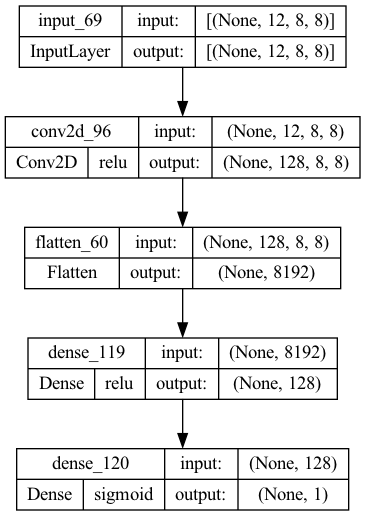

In [6]:
model = models.load_model('models/model_128_filters_1_conv_layers_128_dense_units_16000_batch_size_1_depth_500_batches.h5')
tf.keras.utils.plot_model(
    model,
    to_file='models/model_128_filters_1_conv_layers_128_dense_units_16000_batch_size_1_depth_500_batches.png',
    show_shapes=True,
    show_layer_activations=True
)

In [10]:
batches=1
stockfish_depth = 1
x_train, y_train = load_dataset(batches=batches, stockfish_depth=stockfish_depth)

In [19]:
y_train

array([0.50649351, 0.51331169, 0.47954545, ..., 0.50974026, 0.51785714,
       0.51006494])